In [3]:
import pandas as pd
# drive.mount('/content/drive')

In [6]:
#get the file 
df =  pd.read_csv('bank-additional/bank-additional/bank-additional-full.csv' , sep=";" , engine='python')
df.to_pickle("./bankcsv.pkl")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


 The duration skews the analysis as it is not known before a call is made and should therefore be dropped before we feed this data to our model 

In [43]:
df.drop('duration' , axis=1 , inplace=True)
df.info() , df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  int64  
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

(None,
                age          job       marital     education       default  \
 count  41188.00000  41188.00000  41188.000000  41188.000000  41188.000000   
 mean      40.02406      3.72458      1.172769      3.747184      0.208872   
 std       10.42125      3.59456      0.608902      2.136482      0.406686   
 min       17.00000      0.00000      0.000000      0.000000      0.000000   
 25%       32.00000      0.00000      1.000000      2.000000      0.000000   
 50%       38.00000      2.00000      1.000000      3.000000      0.000000   
 75%       47.00000      7.00000      2.000000      6.000000      0.000000   
 max       98.00000     11.00000      3.000000      7.000000      2.000000   
 
             housing          loan       contact      campaign         pdays  \
 count  41188.000000  41188.000000  41188.000000  41188.000000  41188.000000   
 mean       1.071720      0.327425      0.365252      2.567593    962.475454   
 std        0.985314      0.723616      0.481507 

From the information , we can see we have no null entries in the dataframe 
Hence , we can go forward and explore the relationships in the data



In [ ]:
corr_to_target = corr_mat["median_house_value"].sort_values(ascending=False)

In [31]:
categorical = ['job' , 'marital' , 'education' , 'y' , 'poutcome' , 'contact' , 'housing' , 'default' , 'loan']
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
def convert_categorical(dataframe , columns):
    encoder = LabelEncoder()
    for item in columns:
        encoded_df = encoder.fit_transform(dataframe[item])
        dataframe[item] = encoded_df
    return encoded_df

In [44]:
convert_categorical(df , categorical)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,may,mon,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,may,mon,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,may,mon,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,may,mon,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,may,mon,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,nov,fri,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,nov,fri,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,nov,fri,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,nov,fri,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


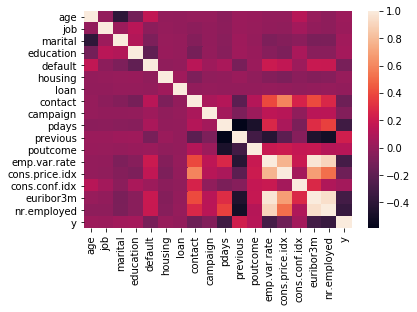

In [45]:
import seaborn as sns
corr_mat = df.corr()
sns.heatmap(corr_mat)


In [46]:
impact_on_target = corr_mat["y"].sort_values(ascending=False)
impact_on_target

y                 1.000000
previous          0.230181
poutcome          0.129789
education         0.057799
cons.conf.idx     0.054878
marital           0.046203
age               0.030399
job               0.025122
housing           0.011552
loan             -0.004909
campaign         -0.066357
default          -0.099352
cons.price.idx   -0.136211
contact          -0.144773
emp.var.rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr.employed      -0.354678
Name: y, dtype: float64

From the above , we can see there are two main variables that impact the uptake of term deposits : previous and the number employed. As the number of contacts performed before this campaign for this client (*previous*) increases, the number of term deposits increases and as the number employed increases , the term deposits taken decrease

Additionally, as the number of days between contact campaigns increases, term deposits decrease

These are the potential columns that could be helpful in currently separating the target column


In [ ]:
feature_cols = ['previous' , 'nr.employed' , 'previous']

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    
('std_scaler', StandardScaler()),
])

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
8061,52,9,0,5,1,2,0,1,jun,mon,8,999,0,1,1.4,94.465,-41.8,4.865,5228.1,0
25300,36,4,1,6,0,2,0,0,nov,tue,2,999,0,1,-0.1,93.200,-42.0,4.153,5195.8,0
17667,53,1,1,3,0,2,2,0,jul,mon,2,999,0,1,1.4,93.918,-42.7,4.962,5228.1,0
37400,45,1,2,2,0,2,0,0,aug,wed,1,4,1,2,-2.9,92.201,-31.4,0.879,5076.2,0
4629,60,3,1,3,1,2,0,1,may,wed,1,999,0,1,1.1,93.994,-36.4,4.858,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40205,28,7,2,3,0,2,0,0,jul,tue,1,999,0,1,-1.7,94.215,-40.3,0.876,4991.6,0
27316,52,9,1,5,0,2,0,0,nov,fri,1,999,1,0,-0.1,93.200,-42.0,4.021,5195.8,0
14392,54,0,1,2,0,0,2,0,jul,mon,4,999,0,1,1.4,93.918,-42.7,4.962,5228.1,0
7494,29,0,1,6,0,0,0,1,may,fri,1,999,0,1,1.1,93.994,-36.4,4.864,5191.0,0


## Scale the previous and number employed column

Get date data from date columns

In [ ]:
date_cols = []